### feature selection(변수 선택법)
* 필요한 변수만 선택하여 모델의 예측력을 높이거나 과적합을 줄이는 것
* 알고리즘의 정확도가 유사하다면 변수의 개수가 적을수록 속도가 빠르다
* 방법
    - L1(라쏘)을 이용하여 영향력이 0(작은)값을 빼는 방법
    - 단변량(filter) : 특정 컬럼이 또 다른 컬럼과 상관관계가 있는지 확인하는 방법
    - 전진/후진 선택법(wrapper) : 컬럼을 하나씩 추가하며 점수 확인 / 하나씩 빼며 점수 확인
    - RFE : 사이킷런에서 제공하는 라이브러리를 이용하여 변수의 중요도를 확인하여 변수를 선택하는 방법
    - embed(임베드) : 알고리즘의 성질 이용
        - 알고리즘 내부에서 각 feature 구송 요소들이 얼마나 사용 되었는지를 알아보는 방식
        - 알고리즘들을 이용해 변수의 중요도를 파악, 중요도 낮은 컬럼은 지울 수 있다
        - 참고
            * RFE와 embed 방식은 특정 알고리즘에 존재하며, 해당 방식을 사용할 수 없는 알고리즘들이 존재한다.(KNN, SVR(kernel=rbf)등 사용 못함)
            * Tree계열 알고리즘들은 사용 가능하다(Random Forest, Decision Tree 등)

### 데이터 셋 로드

In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
df =pd.read_csv('data/bicycle2_cleaning.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,2011-1


### 데이터 셋 분리

In [2]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek', 'year_month'],
      dtype='object')

In [3]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp',
        'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dayofweek']
label = 'count'
X,y = df[features], df[label]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                    train_test_split(X,y, test_size=0.3, random_state=156)

In [5]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

print('train : ', model.score(X_train, y_train))
print('test : ', model.score(X_test, y_test))

train :  0.9928065189188232
test :  0.9497301617692875


### 단변량(filter)
* feature 들의 상관관계가 높은건 제거하는게 좋다

<AxesSubplot:xlabel='temp', ylabel='atemp'>

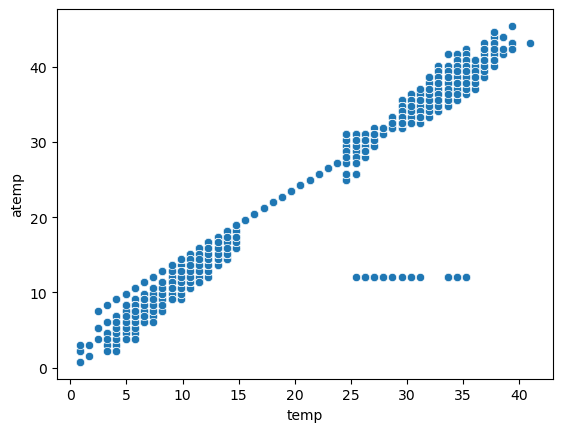

In [6]:
import seaborn as sns
sns.scatterplot(data=df, x='temp',y='atemp')

#temp : 온도 , atemp : 체감온도

#### feature 상관관계

* corr : 상관관계를 보여줌

In [7]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427


#### heatmap 시각화

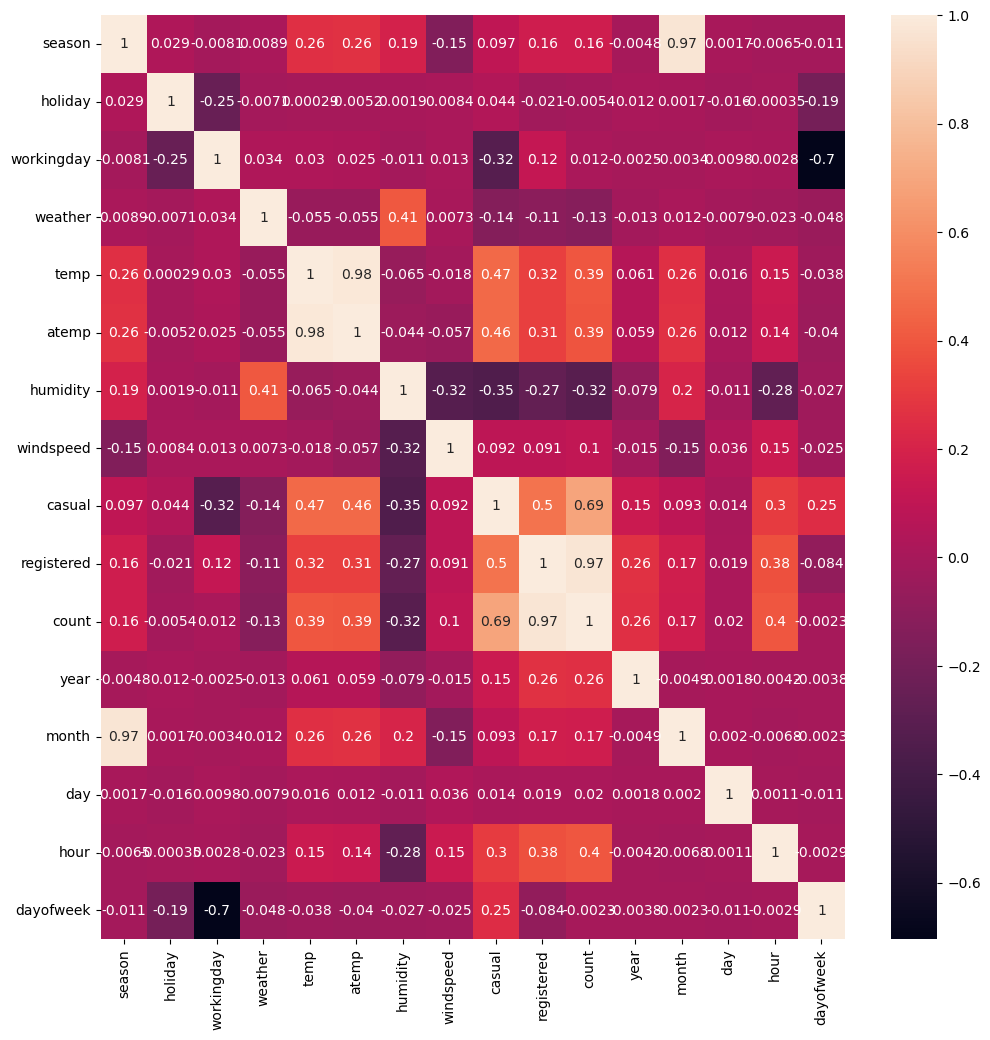

In [8]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

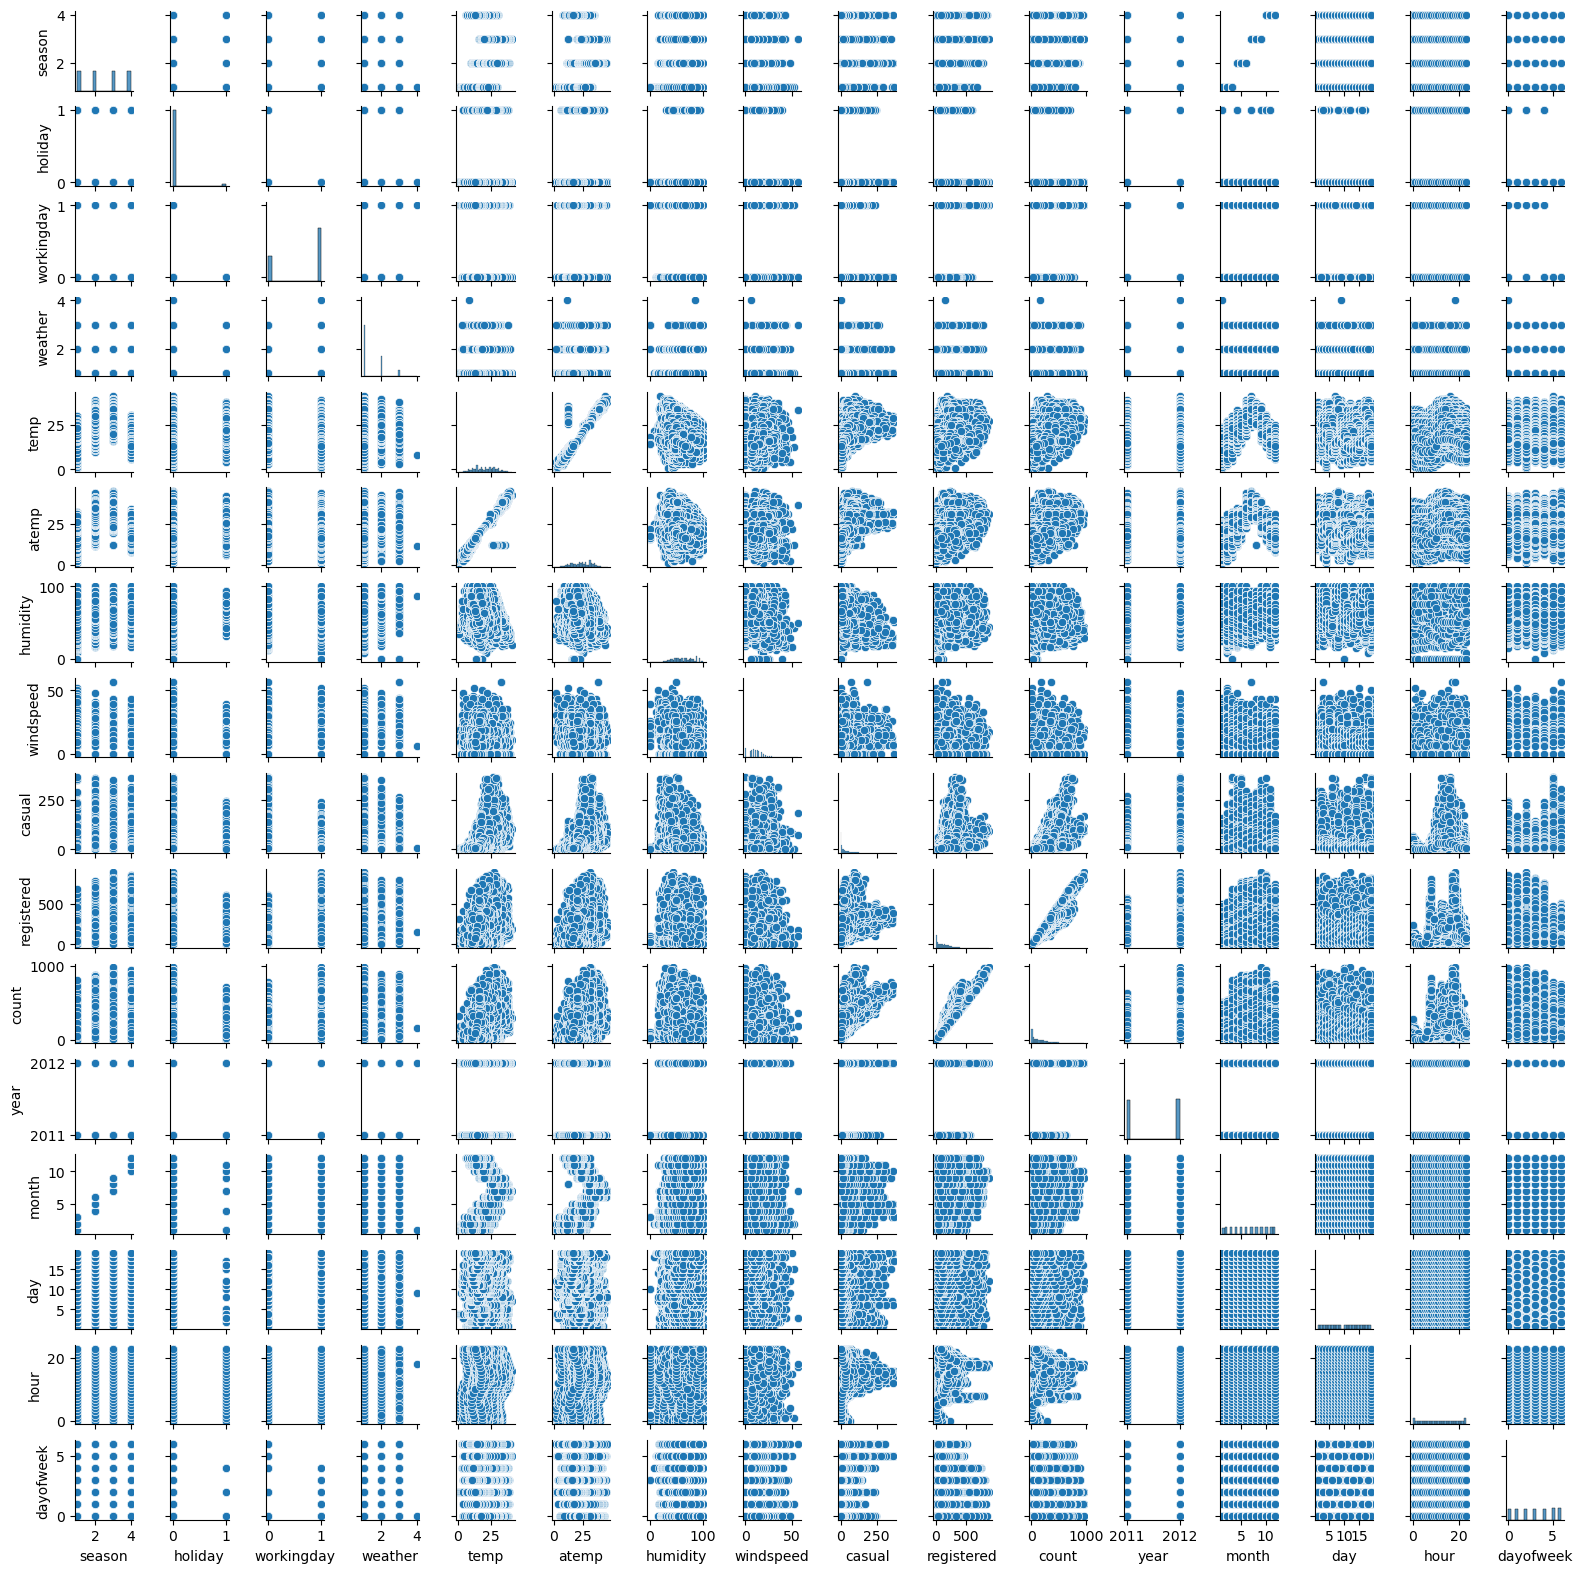

In [9]:
sns.pairplot( df, height=1)
plt.show()

#### filter 결과 확인
* temp, atemp 중 하나 제거

In [10]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
        'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dayofweek']

In [11]:
X_train, X_test, y_train, y_test = \
                    train_test_split(df[features],y, test_size=0.3, random_state=156)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('train : ', model.score(X_train,y_train))
print('test : ', model.score(X_test,y_test))

train :  0.9927333384758419
test :  0.9501135302318975


### wrapper(전진/후진 선택)
* feature를 추가 / 제거하면서 모델의 성능을 확인
* combinations : 모든 값들의 경우의 수를 뽑아준다

In [12]:
from itertools import combinations
sample = [1,2,3,4]
for c in combinations(sample, 2):
    print(c,type(c))

(1, 2) <class 'tuple'>
(1, 3) <class 'tuple'>
(1, 4) <class 'tuple'>
(2, 3) <class 'tuple'>
(2, 4) <class 'tuple'>
(3, 4) <class 'tuple'>


In [13]:
all_result = []
for c in combinations(features, 2):
    X_train, X_test, y_train, y_test = \
        train_test_split(df[list(c)], y, test_size=0.3, random_state=156)
    
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    sub_result = {'combination':str(c),
                 'train_s':train_score,
                 'test_s': test_score}
    all_result.append(sub_result)
    
result_df= pd.DataFrame(all_result).sort_values(by='test_s')
result_df.tail()

,combination,train_s,test_s
61,"('month', 'hour')",0.636939,0.602353
58,"('year', 'hour')",0.625849,0.603238
9,"('season', 'hour')",0.610068,0.606170
65,"('hour', 'dayofweek')",0.661618,0.634510
28,"('workingday', 'hour')",0.655690,0.650100


In [14]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
        'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dayofweek']
best_features = ['workingday','hour']

In [15]:
all_result = []
for c in features:
    best_features.append(c)
    
    X_train, X_test, y_train, y_test = \
        train_test_split(df[best_features], y, test_size=0.3, random_state=156)
    
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    sub_result = {'combination':best_features.copy(),
                 'train_s':train_score,
                 'test_s': test_score}
    all_result.append(sub_result)
    best_features.pop()
    
result_df= pd.DataFrame(all_result).sort_values(by='test_s')
result_df.tail()

,combination,train_s,test_s
3,"[workingday, hour, weather]",0.686366,0.682785
4,"[workingday, hour, temp]",0.826815,0.742658
8,"[workingday, hour, month]",0.785862,0.746558
0,"[workingday, hour, season]",0.754027,0.754846
7,"[workingday, hour, year]",0.767796,0.764872


#### 후진 선택 방법
* feature의 모든 값을 넣고 하나씩 제거하면서 확인하는 방식

In [16]:
all_result = []
features = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp',
        'humidity', 'year', 'month', 'day', 'hour', 'dayofweek']
for item in combinations( features, len(features)-1):
#     print(item)
    target = list(item)
    
    X_train,X_test,y_train,y_test = \
        train_test_split(df[target],y, test_size=0.3, random_state=156)
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    dropped = set(features) - set(target)
    
    sub_result = {'dropped':dropped.pop(),
                 'train_s':train_score,
                 'test_s':test_score}
    
    all_result.append(sub_result)
result_df = pd.DataFrame(all_result).sort_values('test_s')
result_df

,dropped,train_s,test_s
1,hour,0.861485,0.431861
4,year,0.981945,0.878571
5,humidity,0.992225,0.942655
9,workingday,0.992707,0.945675
8,weather,0.992235,0.946263
0,dayofweek,0.991782,0.946444
3,month,0.992427,0.948215
2,day,0.992793,0.949386
10,holiday,0.992742,0.950196
11,season,0.992835,0.950685


### RFE
* 사이킷런에서 제공하는 라이브러리
* 변수의 중요도를 알려준다

In [17]:
from sklearn.feature_selection import RFE

features = [ 'season', 'holiday', 'workingday', 
            'weather', 'temp', 'atemp', 'humidity', 'windspeed', 
            'year', 'month', 'day', 'hour', 'dayofweek']
X_train, X_test, y_train, y_test = \
        train_test_split(df[features], y, test_size=0.3,
                                    random_state=156)
model = RandomForestRegressor()

rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame()

rfe_df['ranking'] = rfe.ranking_
rfe_df['feature'] = X_train.columns
rfe_df.sort_values('ranking')

,ranking,feature
2,1,workingday
4,1,temp
5,1,atemp
8,1,year
9,1,month
11,1,hour
12,2,dayofweek
6,3,humidity
3,4,weather
10,5,day


In [18]:
f = ['workingday', 'temp', 'atemp', 'year',
    'month', 'hour', 'dayofweek','humidity']
X_r, X_t, y_r, y_t = \
        train_test_split(df[f], y, test_size=0.3,
                       random_state=156 )
r = RandomForestRegressor()
r.fit(X_r, y_r)
print('r : ',r.score(X_r, y_r))
print('t : ',r.score(X_t, y_t))

model.fit(X_train, y_train)
print('train : ',model.score(X_train, y_train))
print('test : ',model.score(X_test, y_test))

r :  0.9917498072313318
t :  0.9435500860156075
train :  0.9928711284929146
test :  0.950482606281891


### 임베드방식
* 알고리즘 내부의 기능 이용

In [19]:
model.feature_importances_

array([0.00680571, 0.00152946, 0.05842095, 0.01276215, 0.05180046,
       0.04723589, 0.02862641, 0.00798637, 0.0885224 , 0.05293062,
       0.01066909, 0.58965483, 0.04305566])

In [20]:
d = pd.DataFrame()
d['rank'] = model.feature_importances_
d['feature'] = X_train.columns
d.sort_values(by='rank', ascending=False) #내림차순


,rank,feature
11,0.589655,hour
8,0.088522,year
2,0.058421,workingday
9,0.052931,month
4,0.051800,temp
5,0.047236,atemp
12,0.043056,dayofweek
6,0.028626,humidity
3,0.012762,weather
10,0.010669,day
